In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sentiment_tweets3.csv')
# for dataset https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets

In [4]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,10314.0,491253.470525,261688.134407,106.0,263019.25,514988.0,773521.5,802313.0
label (depression result),10314.0,0.224355,0.417177,0.0,0.00,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
df.isna().sum()

,0
Index,0
message to examine,0
label (depression result),0


In [9]:
df['Length'] = df['message to examine'].apply(len)
df.head()

,Index,message to examine,label (depression result),Length
0,106,just had a real good moment. i missssssssss hi...,0,57
1,217,is reading manga http://plurk.com/p/mzp1e,0,42
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45


In [14]:
df['Length'].describe()

,Length
count,10314.000000
mean,92.616153
std,64.670905
min,1.000000
25%,48.000000
50%,78.000000
75%,119.000000
max,874.000000


In [16]:
df_874 = df[df['Length']  == 874]["message to examine"]
for message in df_874:
  print(message)

@doucefeline @WhatASaviour7 @alisawoodard6 @SWantowski @AnitaLea1 @florsunny @redrobin741 @1bramant @LinsonVarughese @blupony3 @bishopdawkins @middlebrookdepe @Ccangelsing @sheila_freda @Blessttt @JackCouch11 @LisaHarlow10 @Jesus_YaHWeH_ @ahmedaniyal @ToddTrotter3 @BelieveAllCom @One_Of_His @endtimeslife @reeves5150 @Sharonrenee15 @JoAnnEileen @Cherami1Sherrie @GregPettys @trinitysfaith @L_Bramant @bailog_cherisse @FlashG_86 @smrutimishra7 @vinodgnair73 @ReginahHope @Twisty58 @doswell_vee @radioshowccc @notjudgin @nhiscare57 @nadiaforjesus @WheatSuzanne @FREEBetsyB @elliesangelwing @mcinnes003 Lord Jesus in Your Powerful Name please remove this mountain of depression off Kieth now and forever that this captive may be set free from this stronghold by the mighty tools of God (2Cor. 10:4-6) THANKYOU Jesus 4 Ur tenderloving care and mercy that endures forever! Amen!


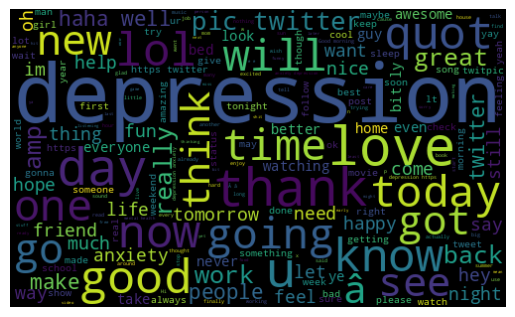

In [18]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['message to examine'])

# Create a WordCloud object with the desired settings
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)

# Display the WordCloud image
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

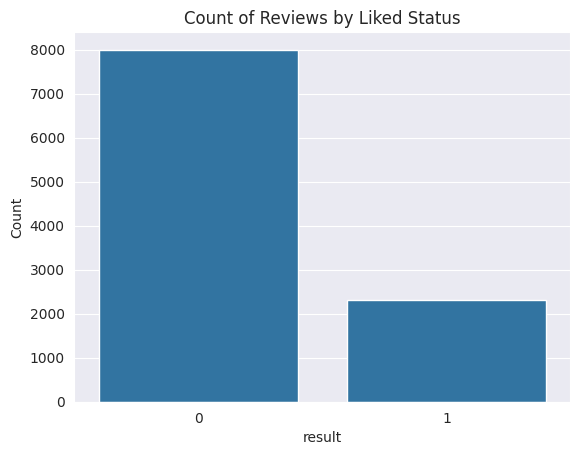

In [24]:
# Set the style of the plot
sns.set_style('darkgrid')

# Create a count plot of the "Liked" column
sns.countplot(x='label (depression result)', data=df)

# Set the title of the plot
plt.title('Count of Reviews by Liked Status')

# Set the label for the x-axis
plt.xlabel('result')

# Set the label for the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()

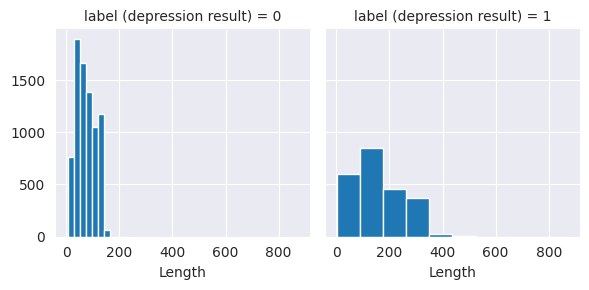

In [25]:
g = sns.FacetGrid(df , col = 'label (depression result)')
g.map(plt.hist , 'Length')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

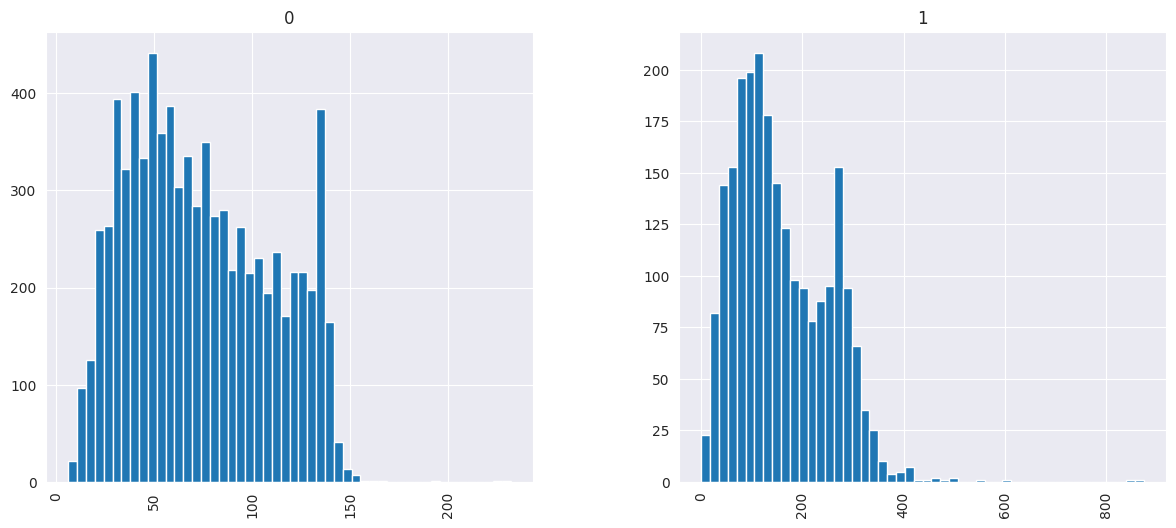

In [26]:
df.hist(column='Length' , by= 'label (depression result)' , bins = 50 , figsize = (14,6))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = df['message to examine'].str.lower()
y = df['label (depression result)']

In [28]:
X = cv.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [31]:
nb.fit(X_train , y_train)
predictions = nb.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_test , predictions))

[[2319   55]
 [  22  699]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2374
           1       0.93      0.97      0.95       721

    accuracy                           0.98      3095
   macro avg       0.96      0.97      0.97      3095
weighted avg       0.98      0.98      0.98      3095



In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [35]:
# Create a pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB objects

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),])  # train on TF-IDF vectors, Naive Bayes classifier

In [36]:
# Get the input data and split it into training and testing sets
X = df['message to examine']
y = df['label (depression result)']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [37]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [38]:
predictions = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2374    0]
 [ 398  323]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2374
           1       1.00      0.45      0.62       721

    accuracy                           0.87      3095
   macro avg       0.93      0.72      0.77      3095
weighted avg       0.89      0.87      0.85      3095



In [39]:
from sklearn import linear_model
logr=linear_model.LogisticRegression()

X = cv.fit_transform(X)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [41]:
logr.fit(X_train,y_train)

LogisticRegression()

In [42]:
logpredictions = logr.predict(X_test)
print(confusion_matrix(y_test,logpredictions))

[[2374    0]
 [   8  713]]


In [43]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2374
           1       1.00      0.99      0.99       721

    accuracy                           1.00      3095
   macro avg       1.00      0.99      1.00      3095
weighted avg       1.00      1.00      1.00      3095

